In [1]:
library('tidyverse')
library('rvest')
library('lubridate')
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: xml2


Attaching package: ‘rvest’


The following object is masked from ‘package:purrr’:

    pluck


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date




In [2]:
scrape_table = function(i, MF='Women\'s') { # scrape table elements and format into df
    url = "https://www.baa.org/races/boston-marathon/results/champions"
    webpage = xml2::read_html(url)
    tbl = html_nodes(webpage, "table")[[i]] %>%
        html_table() %>%
        drop_na() %>%
        magrittr::set_colnames(c('year', 'name', 'country', 'time')) %>%
        mutate(time = hms(time)) %>%
        mutate(race.time = as.numeric(time, 'hours')) %>%
        mutate(MF = MF) %>%
        mutate(
            country.simple = ifelse(
                country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'),
                country,
                'other'
            )
        )
    tbl
}

df.men = scrape_table(1, MF='Men\'s')
df.women = scrape_table(2)

df.marathon = rbind(df.men, df.women)

Let's re-create this chart from FiveThirtyEight

<center>
    <img src="https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png"
         style="width: 600px;"/>
</center>

Preview the data (i.e. `df.marathon`).

In [3]:
df.marathon %>% head

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


Fill in the table below:

| chart property | column name |
| --- | --- |
| x value | year |
| y value | ? |
| color | ? |
| facet value | ? |

Make note of other aesthetic decisions. 
- What's the y-axis title?
- Do the two charts share the same x-axis bounds?
- Is there a legend?

Code your version of the chart below.

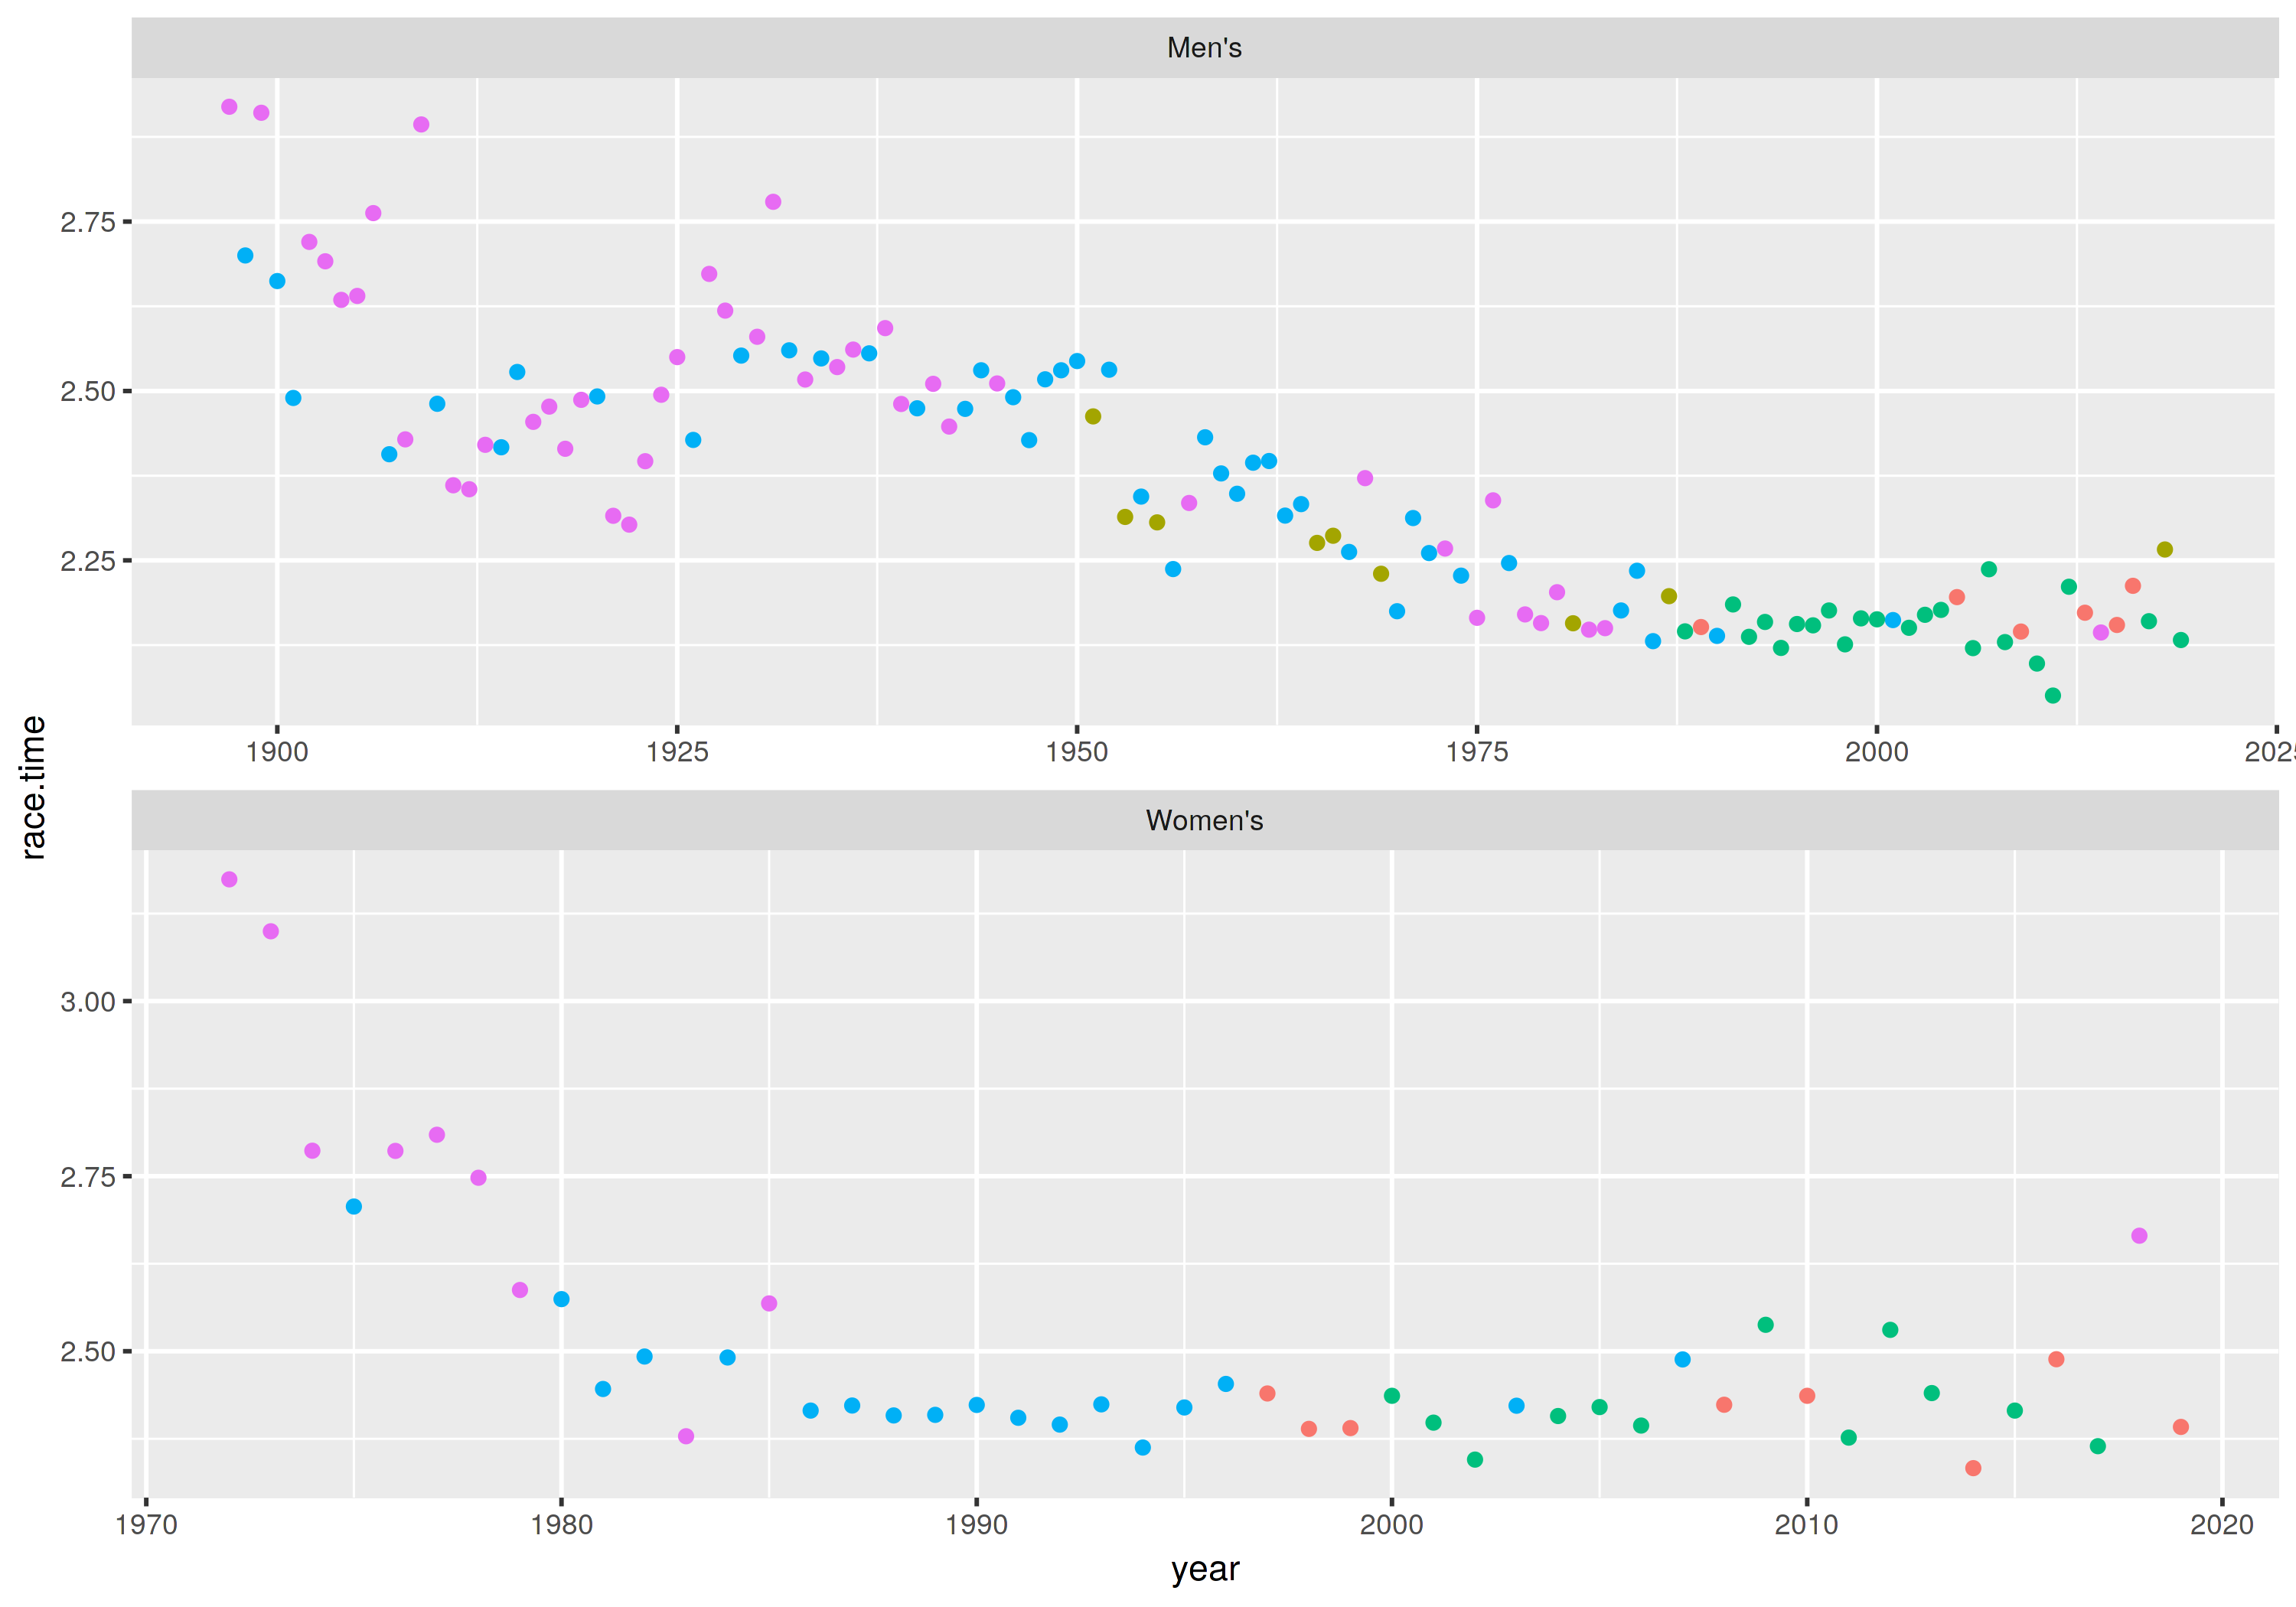

In [13]:
options(repr.plot.res=300, repr.plot.height=7, repr.plot.width=10)
p=ggplot(df.marathon, aes(x=year, y=race.time, color=country.simple))
p=p+geom_point() #position=position_jitter(h=.15, w=0), alpha=.5)
p=p+facet_wrap(~MF, ncol=1, scales="free") #or "free_y" for just y, or "free" for both x and y
p=p+theme(legend.position='none') #legend.text=element_text(face='italic')) #, legend.position='bottom')

p

In [19]:
df.label = df.marathon %>%
    filter(country.simple %in% c("United States", "Japan", "Kenya", "Ethiopia")) %>%
    group_by(MF, country.simple) %>%
    summarize(median.year=median(year), median.time=median(race.time))

df.label %>% head

MF,country.simple,median.year,median.time
<chr>,<chr>,<dbl>,<dbl>
Men's,Ethiopia,2011.0,2.163750
Men's,Japan,1966.0,2.275833
Men's,Kenya,2001.0,2.155139
Men's,United States,1927.5,2.478889
Women's,Ethiopia,2009.0,2.407778
Women's,Kenya,2007.5,2.411389


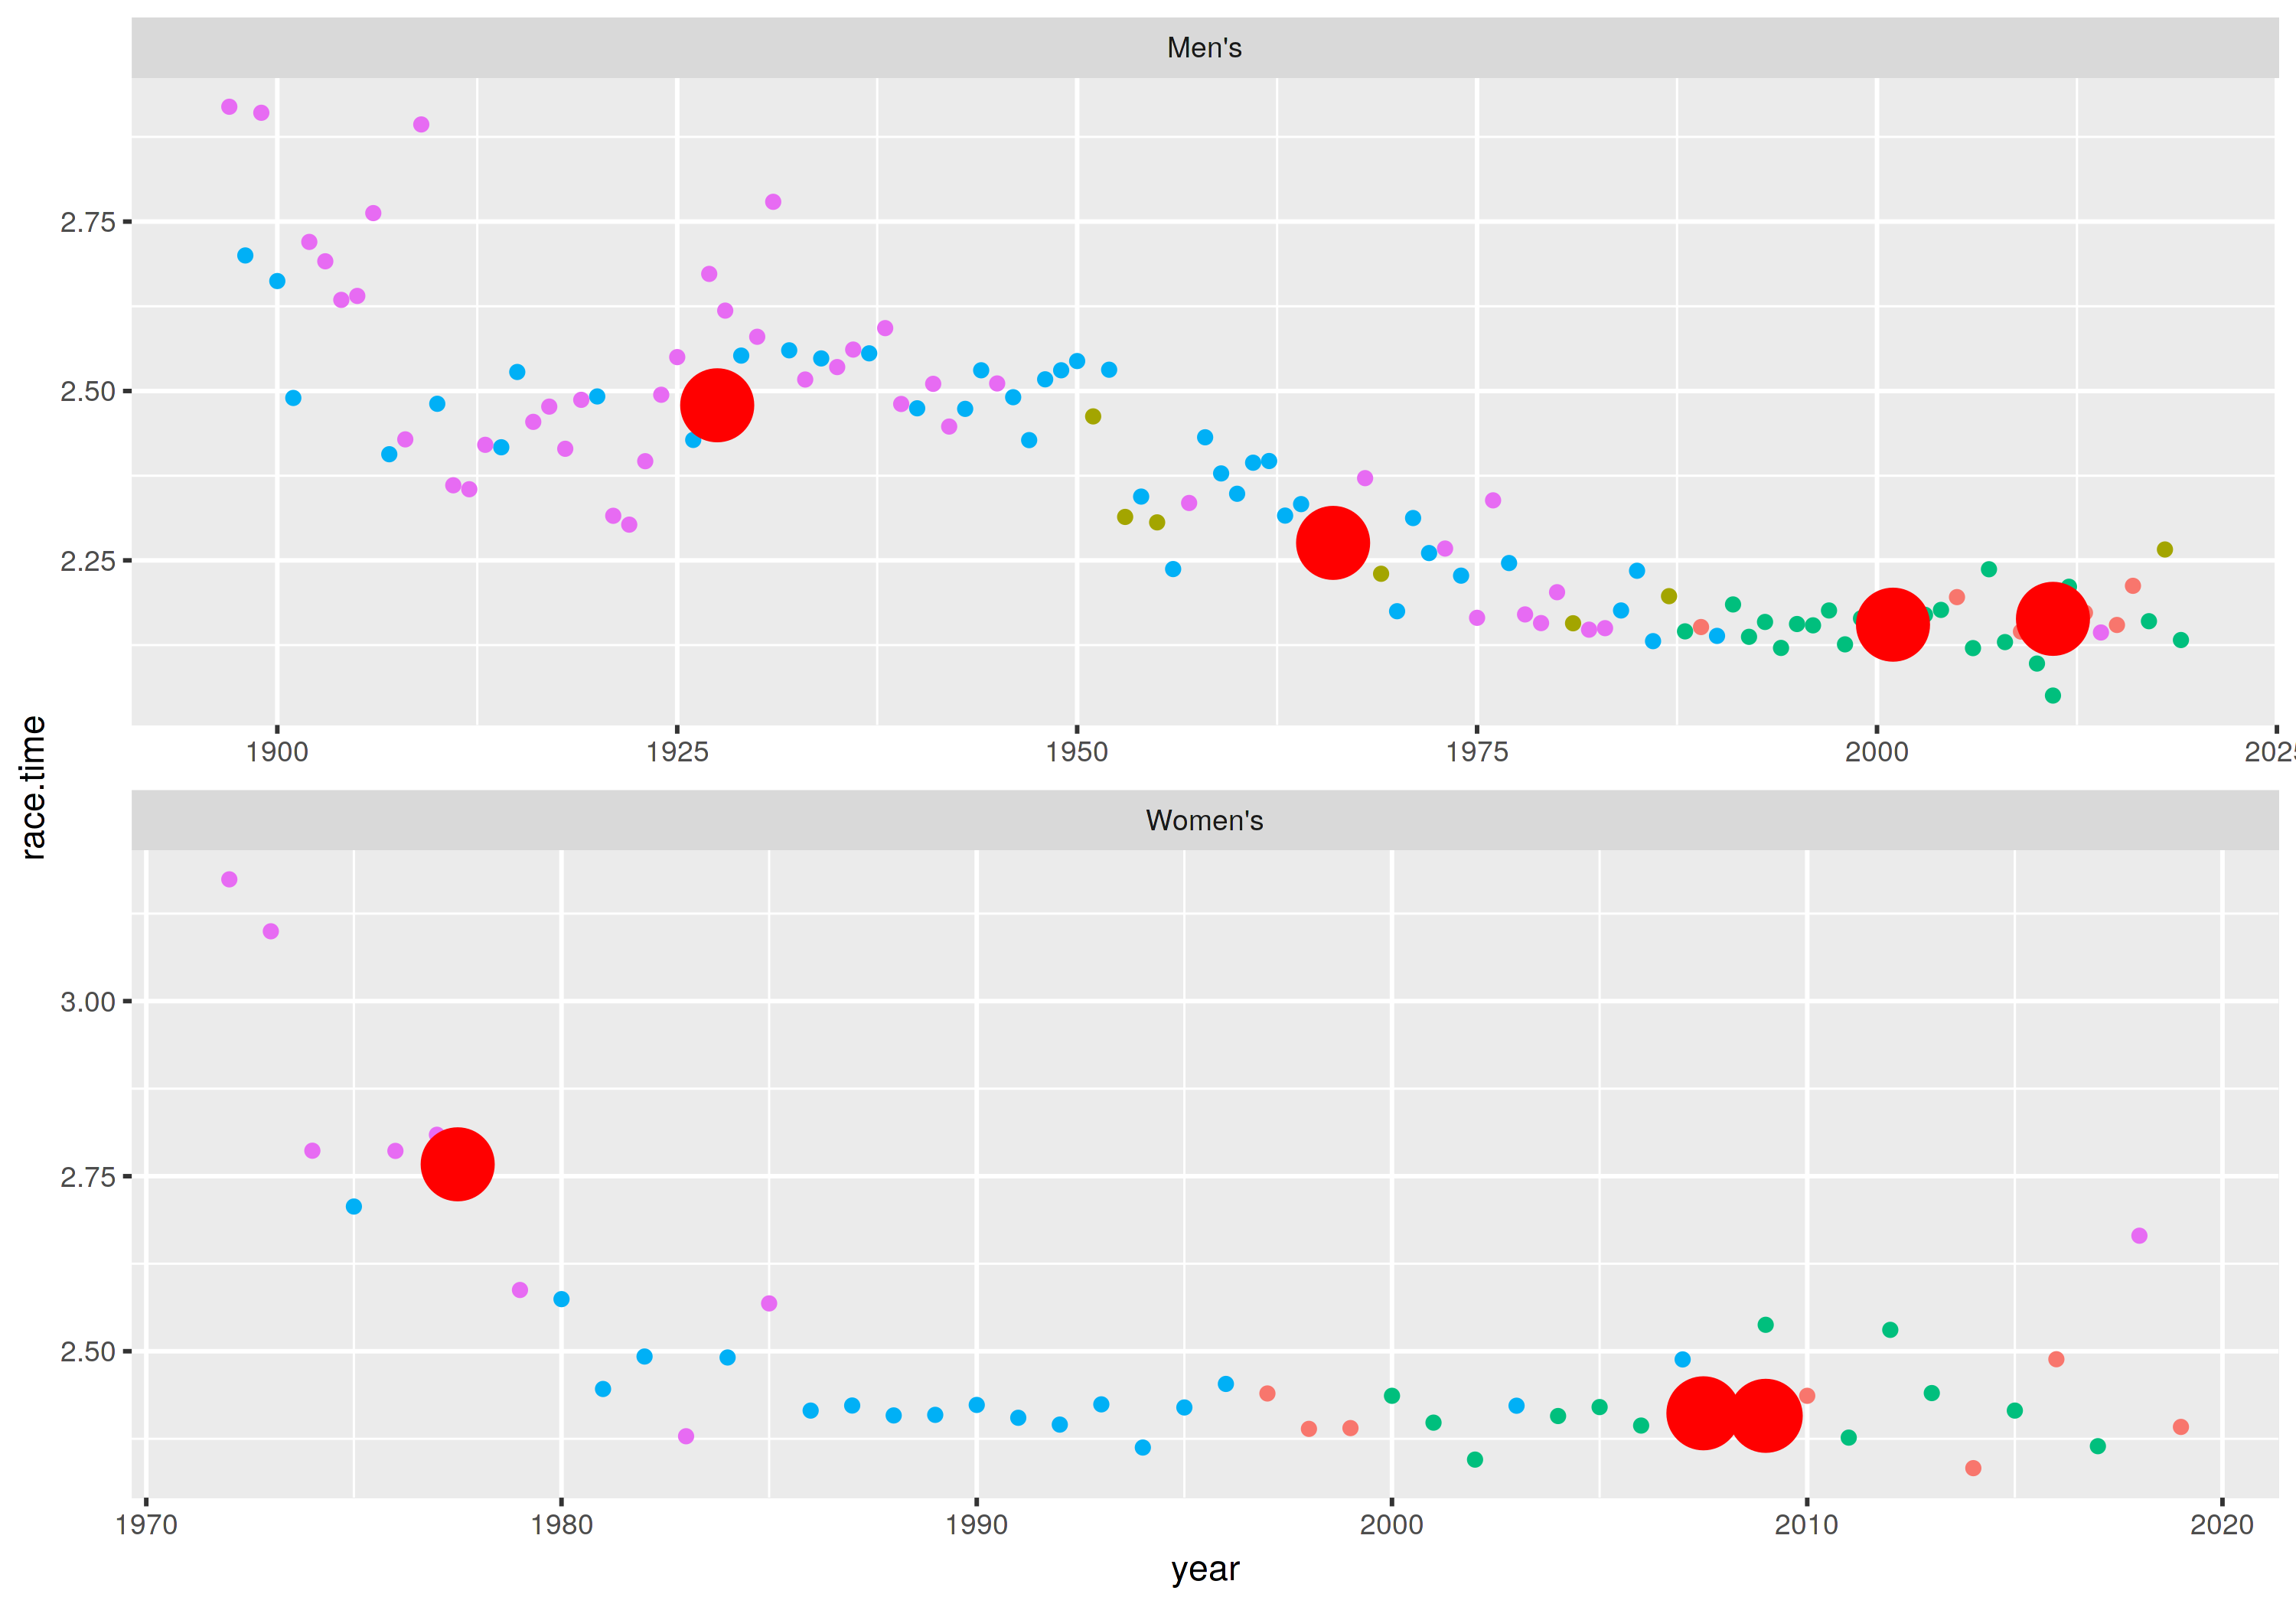

In [21]:
p = p+geom_point(data=df.label, aes(x=median.year, y=median.time), color="red", size=10)
p

What else might you visualize with this data? (e.g. What about totaling the winners from each country?)

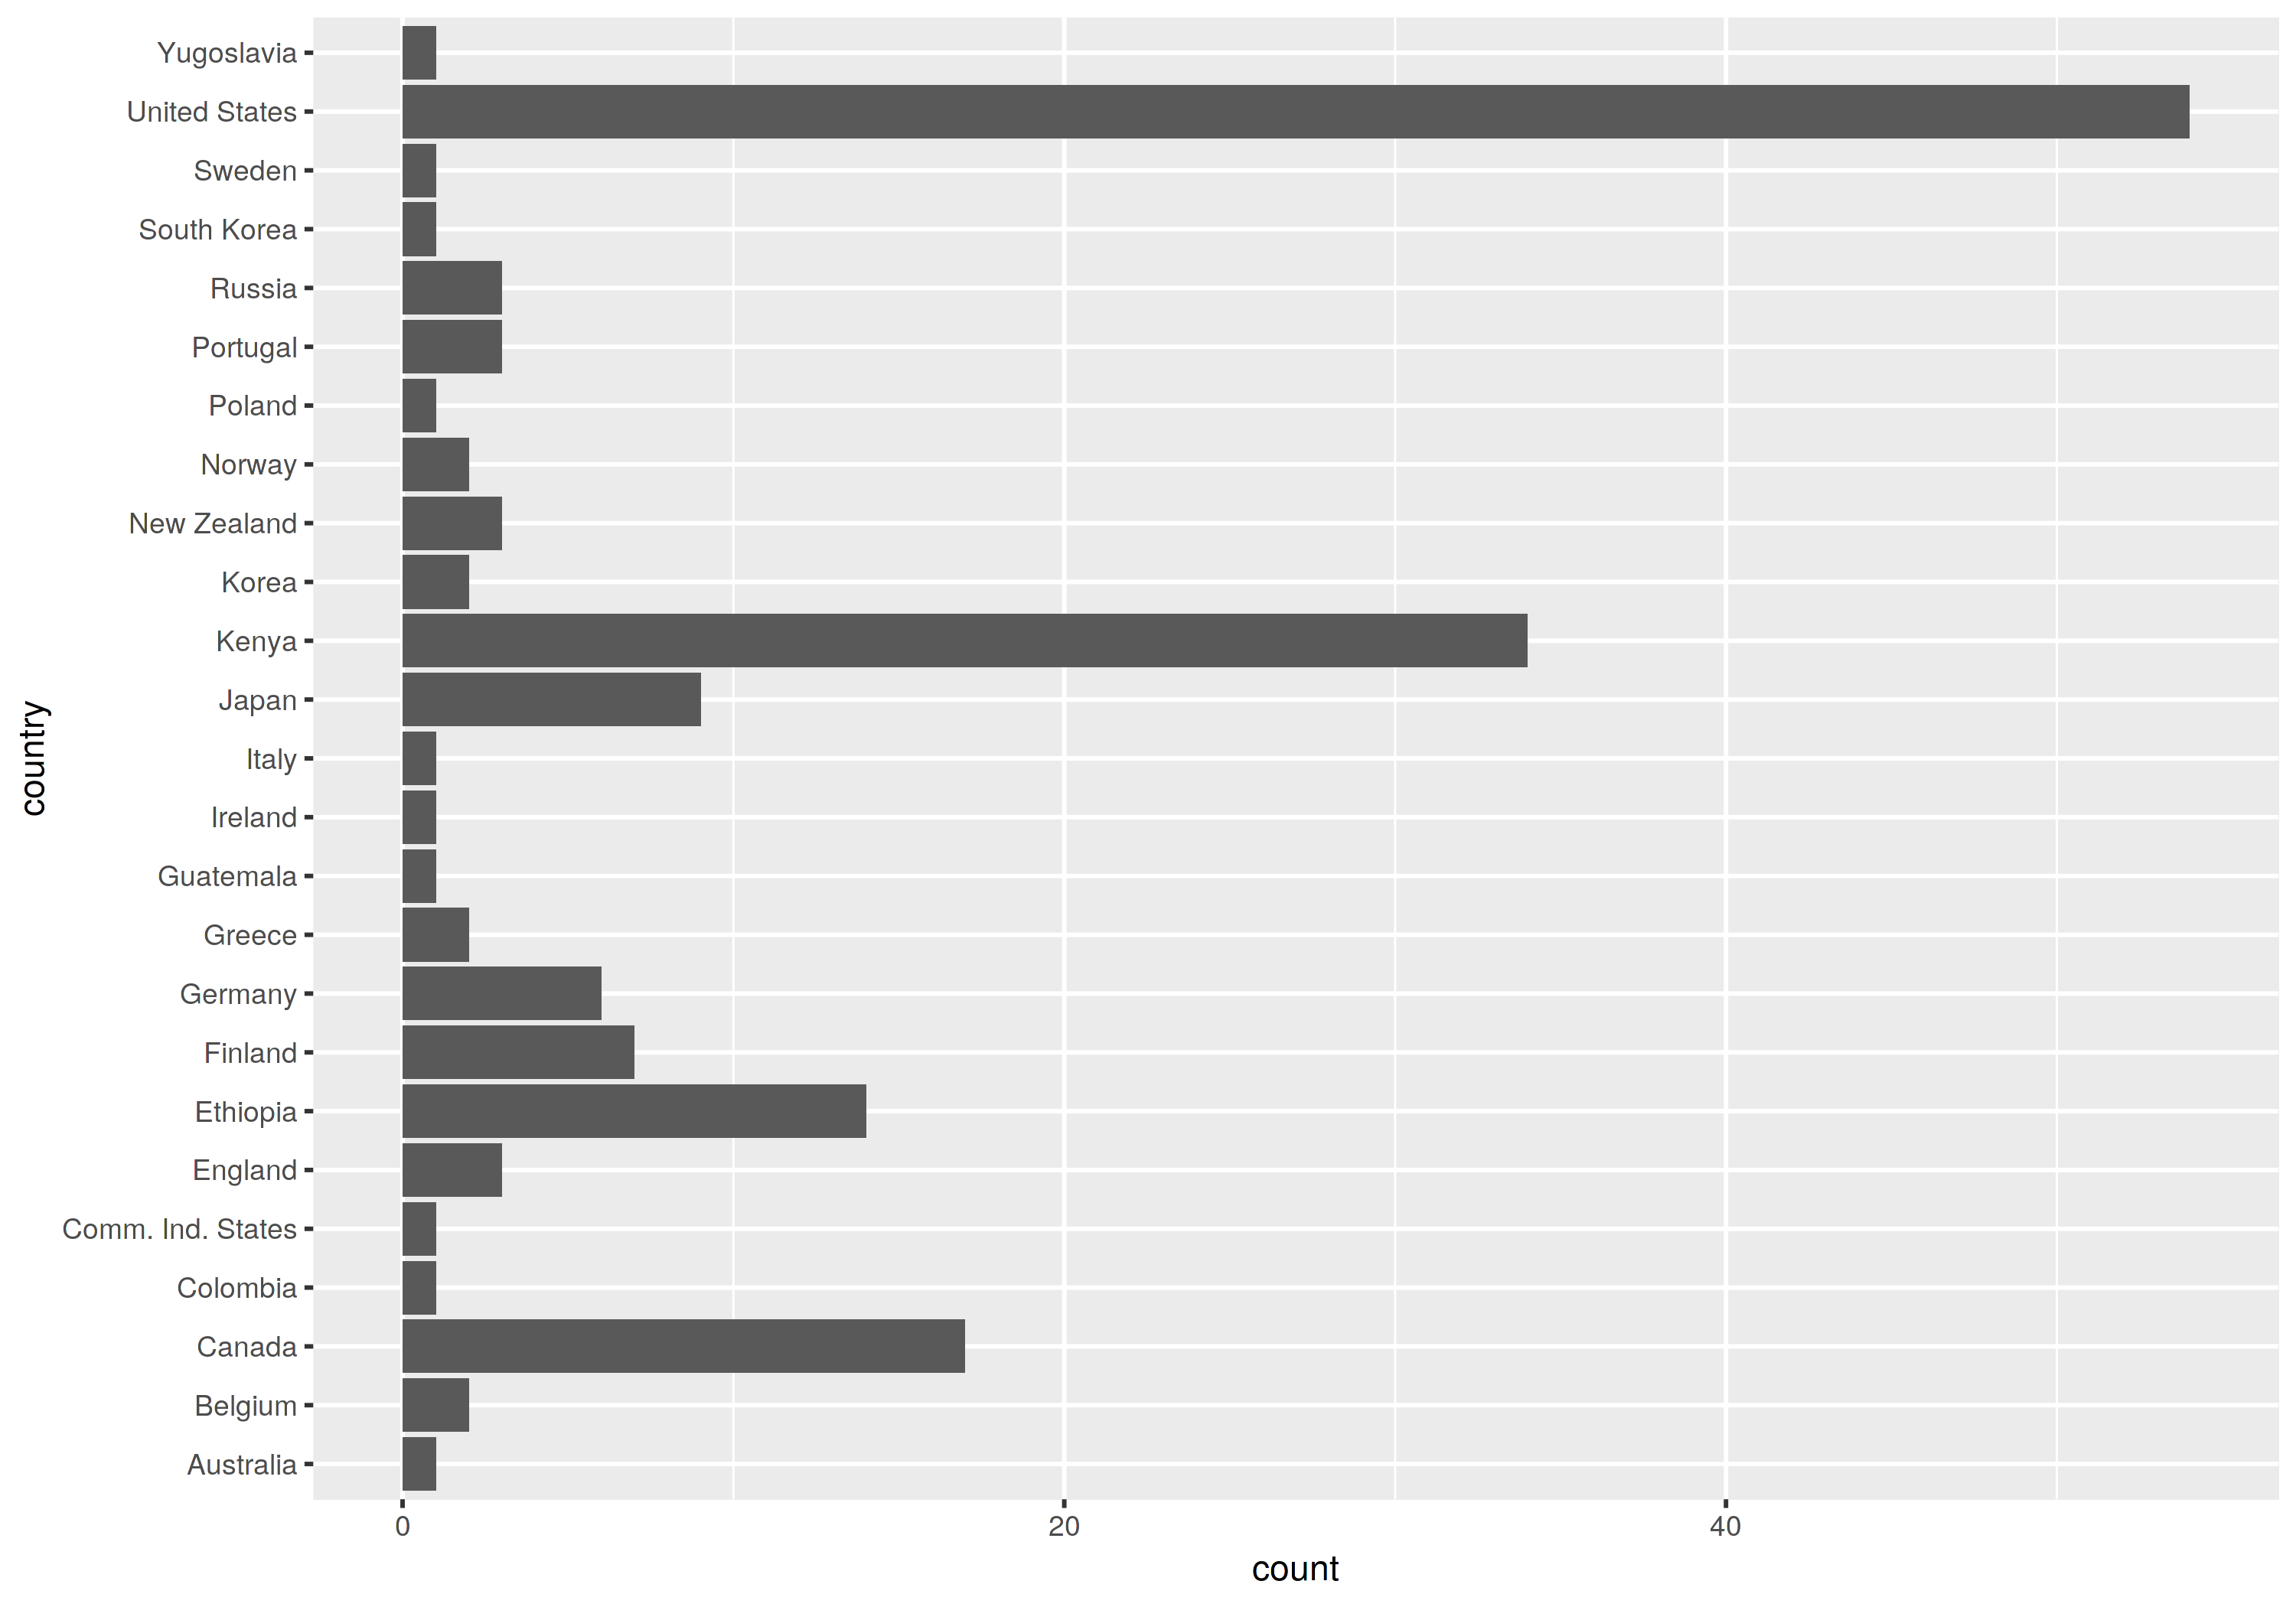

In [12]:
p=ggplot(df.marathon, aes(x=country))
p=p+geom_bar()
p=p+coord_flip()
p